In [4]:
import cv2
import numpy as np
import os
from tqdm import tqdm

VOC_CLASSES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat',
            'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
            'diningtable', 'dog', 'horse', 'motorbike', 'person',
            'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

def class2label(image_id):
    label_file_path = 'VOC2012/SegmentationClass/'
    VOC_COLORMAP = np.array([[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
                         [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
                         [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
                         [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
                         [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
                         [0, 64, 128]])

    label_url = label_file_path + image_id + '.png'
    mask = cv2.imread(label_url)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    mask = mask.astype(int)
    label_mask = np.zeros((mask.shape[0], mask.shape[1]), dtype=np.int16)

    for ii, label in enumerate(VOC_COLORMAP):
      locations = np.all(mask == label, axis=-1)
      label_mask[locations] = ii

    return label_mask

f = open('VOC2012/ImageSets/Segmentation/train.txt', 'r')
tmp = f.readlines()
img_id_list = []
for i in tmp:
    img_id_list.append(i[:-1])

label_hist = np.zeros([21, 3, 256])
for img_id in tqdm(img_id_list[:300]):
    label_img = class2label(img_id)
    img = cv2.imread('VOC2012/JPEGImages/'+img_id+'.jpg')
    width, height, _ = np.shape(img)
    for i in range(width):
        for j in range(height):
            for k in range(3):
                label = label_img[i, j]
                pixel = img[i, j, k]
                label_hist[label, k, pixel] += 1



100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [05:45<00:00,  1.15s/it]


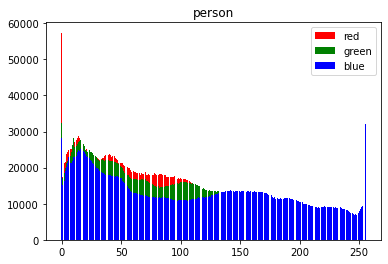

In [22]:
import matplotlib.pyplot as plt
label_id = 15
x = list(range(256))
plt.bar(x, np.squeeze(label_hist[label_id, 0, :]), color='r', label='red')
plt.bar(x, np.squeeze(label_hist[label_id, 1, :]), color='g', label='green')
plt.bar(x, np.squeeze(label_hist[label_id, 2, :]), color='b', label='blue')
plt.title(VOC_CLASSES[label_id])
plt.legend()
plt.savefig('hist_'+str(label_id))
plt.show()

In [12]:
np.shape(x)

(255,)